# IMPORT THE NECESSARY PYLTSPICE LIBRARY

In [1]:
import PyLTSpice

# FEED THE NETLIST (.net) FILE after completion

In [2]:
from PyLTSpice import SimRunner, SpiceEditor, LTspice
#CREATING THE OUTPUT FOLDER IN NOTEBOOK PATH
runner = SimRunner(output_folder='./LLGnoiseless_op', simulator=LTspice)
netlist = SpiceEditor("LLGnoiseless.net")

# modify netlists, then run/comile it to generate an output file (inc log)

In [3]:
from PyLTSpice import SimRunner, SpiceEditor, LTspice

# define simulation
netlist.add_instructions(
     ".tran 10u"
)


    # overriding he automatic netlist naming
run_netlist_file = "{}.net".format(netlist.netlist_file.name)
raw, log = runner.run_now(netlist, run_filename=run_netlist_file)
        # Process here the simulation results


# Reading the raw files, get the req traces, then plot required values

['time', 'V(isx)', 'V(isy)', 'V(isz)', 'V(hbx)', 'V(hby)', 'V(hbz)', 'V(theta)', 'V(phi)', 'V(hsx)', 'V(hsy)', 'V(hsz)', 'V(hx)', 'V(hy)', 'V(hz)', 'I(Ehsx)', 'I(Ehsy)', 'I(Ehsz)', 'I(Ehx)', 'I(Ehy)', 'I(Ehz)', 'I(Gtheta_uniax)', 'I(Gtheta_demag)', 'I(Gtheta_ext)', 'I(Gtheta_spin)', 'I(Gphi_uniax)', 'I(Gphi_demag)', 'I(Gphi_ext)', 'I(Gphi_spin)', 'I(Ctheta)', 'I(Cphi)', 'I(V_isx)', 'I(V_isy)', 'I(V_isz)', 'I(V_hbx)', 'I(V_hby)', 'I(V_hbz)']
OrderedDict([('Filename', PosixPath('LLGnoiseless_op/LLGnoiseless.net.raw')), ('Title', '* main circuit with llg solver'), ('Date', 'Sat Jul 13 16:26:01 2024'), ('Plotname', 'Transient Analysis'), ('Flags', 'real forward'), ('No. Variables', 37), ('No. Points', 35), ('Offset', '0.0000000000000000e+00'), ('Command', 'Linear Technology Corporation LTspice'), ('Variables', ['time', 'V(isx)', 'V(isy)', 'V(isz)', 'V(hbx)', 'V(hby)', 'V(hbz)', 'V(theta)', 'V(phi)', 'V(hsx)', 'V(hsy)', 'V(hsz)', 'V(hx)', 'V(hy)', 'V(hz)', 'I(Ehsx)', 'I(Ehsy)', 'I(Ehsz)', '

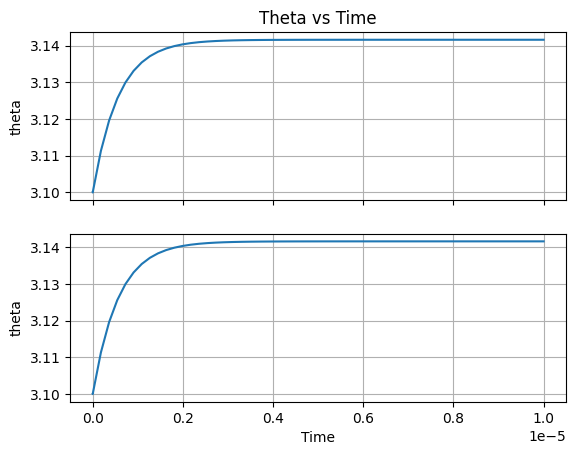

In [5]:
from PyLTSpice import RawRead
import matplotlib.pyplot as plt

# Read the RAW file contents from disk
raw = RawRead("./LLGnoiseless_op/LLGnoiseless.net.raw")

# Get and print a list of all the traces
print(raw.get_trace_names())

# Print all the properties found in the Header section
print(raw.get_raw_property())

# Get the trace data
vin = raw.get_trace('time')
vout = raw.get_trace('V(theta)')

# Get list of step numbers ([0,1,2]) for sweeped simulations
# Returns [0] if there is just 1 step
steps = raw.get_steps()

# Create the canvas for plotting
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)

# Use grid on both subplots
for ax in (ax1, ax2):
    ax.grid(True)

# Get the wave data
xdata = vin.get_wave()
ydata = vout.get_wave()

# Plot data on both subplots (modify as necessary)
ax1.plot(xdata, ydata)
ax1.set_ylabel('theta')

# You can plot something else on ax2 if needed. For now, plotting the same data
ax2.plot(xdata, ydata)
ax2.set_xlabel('Time')
ax2.set_ylabel('theta')

# Adding titles
ax1.set_title('Theta vs Time')

# Show the plot
plt.show()
